Data fields
Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

### 1.1 import some necessary librairies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2 import and put the train and test datasets in  pandas dataframe

In [2]:
train = pd.read_csv('train_1.csv')
test = pd.read_csv('test_1.csv')

### 1.3 display the first five rows of the train dataset.

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.4 display the first five rows of the test dataset.

In [4]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 1.5 check the numbers of samples and features

In [5]:
print(train.count(),"\n************************\n",test.count(),"\n************************\n",train.shape,",",test.shape,"\n************************\n",train.size,",",test.size)

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64 
************************
 Id               1459
MSSubClass       1459
MSZoning         1455
LotFrontage      1232
LotArea          1459
                 ... 
MiscVal          1459
MoSold           1459
YrSold           1459
SaleType         1458
SaleCondition    1459
Length: 80, dtype: int64 
************************
 (1460, 81) , (1459, 80) 
************************
 118260 , 116720


### 1.6 Save the 'Id' column

In [6]:
Id_train =  train['Id'].copy() 
Id_test =  test['Id'].copy()

### 1.7 Now drop the  'Id' colum since it's unnecessary for  the prediction process.

In [7]:
train = train.drop(['Id'], axis=1)
test = test.drop(['Id'], axis=1)
train.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [8]:
test.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


### 1.8 check again the data size after dropping the 'Id' variable

In [9]:
print(" ",train.size ,",",test.size,"\n\n",train.shape,",",test.shape)

  116800 , 115261 

 (1460, 80) , (1459, 79)


## 1.9 Data Processing

### 1.9a) Check the Outliers for  train['GrLivArea'],  train['SalePrice']. And your observation?

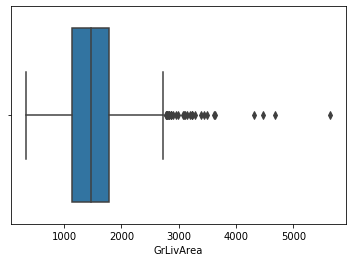

In [10]:
# create subplots  
sns.boxplot(x=train['GrLivArea'])

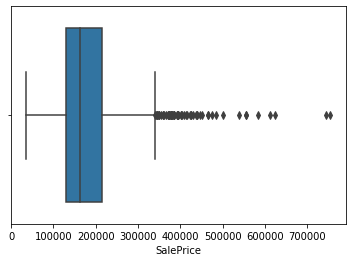

In [11]:
sns.boxplot(x=train['SalePrice'])

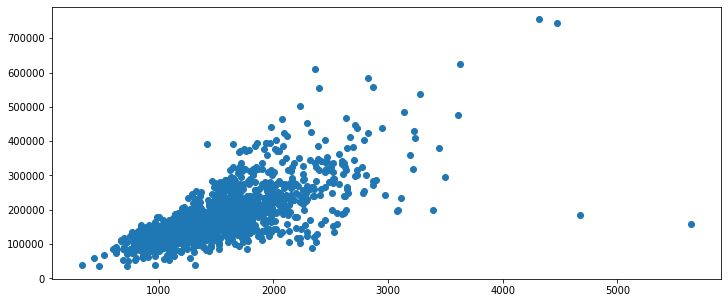

In [12]:
#create scatter plots for train['GrLivArea'],  train['SalePrice']
fig, ax = plt.subplots(figsize= (12,5))
ax.scatter(train['GrLivArea'],train['SalePrice'])
plt.show()

In [13]:
from scipy import stats
z= np.abs(stats.zscore(train['GrLivArea']))
print(z)

[0.37033344 0.48251191 0.51501256 ... 1.56964722 0.83278768 0.49393395]


In [14]:
z2= np.abs(stats.zscore(train['SalePrice']))
print(z2)

[0.34727322 0.00728832 0.53615372 ... 1.07761115 0.48852299 0.42084081]


In [15]:
Q1= train['GrLivArea'].quantile(0.25)
Q3= train['GrLivArea'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

647.25


In [16]:
Q11= train['SalePrice'].quantile(0.25)
Q31= train['SalePrice'].quantile(0.75)
IQR1 = Q31-Q11
print(IQR1)

84025.0


In [17]:
len(train['GrLivArea'])

1460

In [18]:
np.where((((train['GrLivArea'] <(Q1-1.5*IQR)) | (train['GrLivArea'] >(Q3+1.5*IQR)))))

(array([  58,  118,  185,  197,  231,  304,  324,  496,  523,  583,  608,
         635,  691,  769,  798,  803,  961, 1024, 1031, 1046, 1142, 1169,
        1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1386], dtype=int64),)

In [19]:
len(np.where((((train['GrLivArea'] <(Q1-1.5*IQR)) | (train['GrLivArea'] >(Q3+1.5*IQR)))))[0])

31

In [20]:
len(train['SalePrice'])

1460

In [21]:
np.where((((train['SalePrice'] <(Q11-1.5*IQR1)) | (train['SalePrice'] >(Q31+1.5*IQR1)))))

(array([  11,   53,   58,  112,  151,  161,  178,  185,  224,  231,  278,
         309,  313,  320,  321,  336,  349,  378,  389,  440,  473,  477,
         481,  496,  515,  527,  585,  591,  608,  642,  644,  654,  661,
         664,  678,  688,  691,  702,  718,  769,  774,  798,  803,  825,
         877,  898,  987,  990, 1046, 1142, 1169, 1181, 1182, 1228, 1243,
        1267, 1268, 1353, 1373, 1388, 1437], dtype=int64),)

In [22]:
len(np.where((((train['SalePrice'] <(Q11-1.5*IQR1)) | (train['SalePrice'] >(Q31+1.5*IQR1)))))[0])

61

In [23]:
train_copy = train.copy() 

In [24]:
Q111= train.quantile(0.25)
Q311= train.quantile(0.75)
IQR11 = Q311-Q111
print(IQR11) # for checking outliers for whole df

MSSubClass          50.00
LotFrontage         21.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         41.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float64


In [25]:
np.where((train < (Q11 - 1.5 *IQR11)) | (train > (Q311+ 1.5*IQR11)))

(array([   0,    0,    0, ..., 1459, 1459, 1459], dtype=int64),
 array([ 0,  1,  2, ..., 77, 78, 79], dtype=int64))

#### observation:


In [26]:
print("Total 31 outliers in GrLivArea and 61 in SalePrice, based on IQR Score method")

Total 31 outliers in GrLivArea and 61 in SalePrice, based on IQR Score method


### 1.9 b) Deleting outliers.And your observation?

In [27]:
##Replaced outliers in GrLivArea
whisker1=Q1-1.5*IQR
for i in (np.where((train_copy['GrLivArea'] < whisker1))):
    train_copy.iloc[i, train_copy.columns.get_loc('GrLivArea')]= whisker1
whisker2=Q3+1.5*IQR
for i in (np.where((train_copy['GrLivArea'] > whisker2))): 
    train_copy.iloc[i, train_copy.columns.get_loc('GrLivArea')]= whisker2
len(np.where((((train_copy['GrLivArea'] <(Q1-1.5*IQR)) | (train_copy['GrLivArea'] >(Q3+1.5*IQR)))))[0])

0

In [28]:
##Replaced outliers in SalePrice
whisker11=Q11-1.5*IQR1
for i in (np.where((train_copy['SalePrice'] < whisker11))):
    train_copy.iloc[i, train_copy.columns.get_loc('SalePrice')]= whisker11
whisker21=Q31+1.5*IQR1
for i in (np.where((train_copy['SalePrice'] > whisker21))): 
    train_copy.iloc[i, train_copy.columns.get_loc('SalePrice')]= whisker21
len(np.where((((train_copy['SalePrice'] <(Q11-1.5*IQR1)) | (train_copy['SalePrice'] >(Q31+1.5*IQR1)))))[0])

0

In [29]:
train_copy_2 = train.copy()

In [30]:
##Deleting rows having outliers in GrLivArea or SalePrice based on IQR Score method
for i in (np.where((train_copy_2['GrLivArea'] < whisker1) | (train_copy_2['GrLivArea'] > whisker2))):
    train_copy_2.drop(train_copy_2.index[i],inplace=True) 
for i in (np.where((train_copy_2['SalePrice'] < whisker11) | (train_copy_2['SalePrice'] > whisker21))):
    train_copy_2.drop(train_copy_2.index[i],inplace=True) 
len(np.where((((train_copy_2['GrLivArea'] <(Q1-1.5*IQR)) | (train_copy_2['GrLivArea'] >(Q3+1.5*IQR)))))[0]) , len(np.where((((train_copy_2['SalePrice'] <(Q11-1.5*IQR1)) | (train_copy_2['SalePrice'] >(Q31+1.5*IQR1)))))[0])

(0, 0)

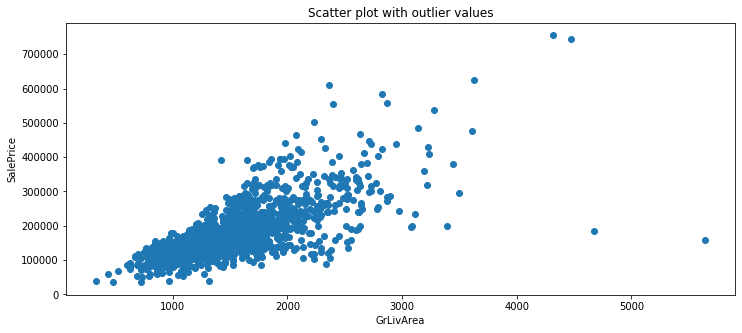

In [31]:
#Check the graphic again

#create scatterplot for train['GrLivArea'], train['SalePrice']

fig, ax = plt.subplots(figsize= (12,5))
ax.scatter(train['GrLivArea'],train['SalePrice']) 
ax.set_title('Scatter plot with outlier values') 
ax.set_xlabel('GrLivArea')
ax.set_ylabel('SalePrice')
plt.show()

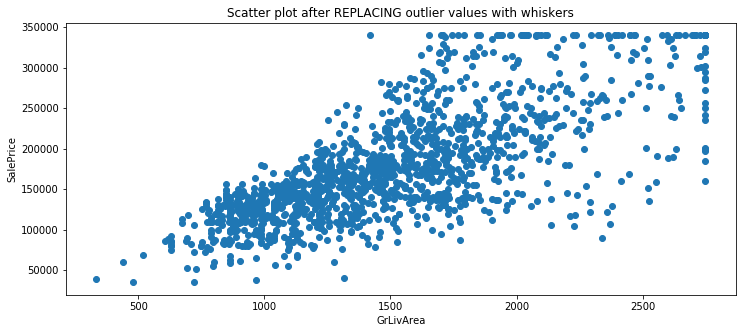

In [32]:
fig, ax = plt.subplots(figsize= (12,5))
ax.scatter(train_copy['GrLivArea'],train_copy['SalePrice']) 
ax.set_title('Scatter plot after REPLACING outlier values with whiskers') 
ax.set_xlabel('GrLivArea')
ax.set_ylabel('SalePrice')
plt.show()

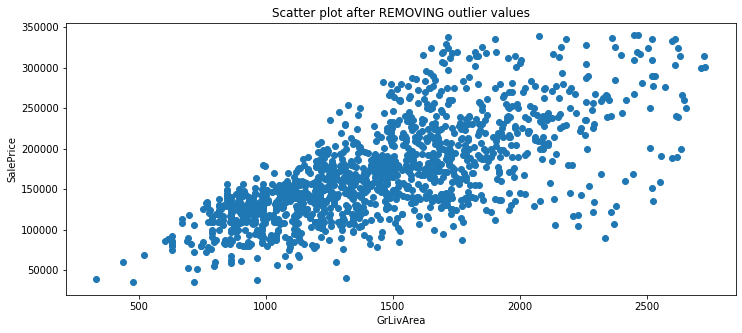

In [33]:
fig, ax = plt.subplots(figsize= (12,5))
ax.scatter(train_copy_2['GrLivArea'],train_copy_2['SalePrice']) 
ax.set_title('Scatter plot after REMOVING outlier values') 
ax.set_xlabel('GrLivArea')
ax.set_ylabel('SalePrice')
plt.show()

#### observation:
  

In [34]:
print("After dealing with outlier values, we could focus more on common patterns")

After dealing with outlier values, we could focus more on common patterns


### 1.9 c)Check the Outliers in box plot  for train['GrLivArea'].And your observation?

No more outliers present beyond whiskers


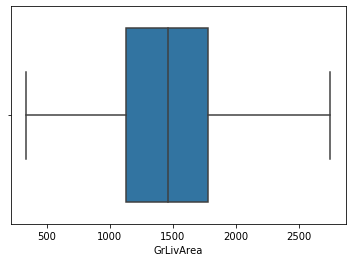

In [35]:
sns.boxplot(x=train_copy['GrLivArea'])
print("No more outliers present beyond whiskers")

### 1.9 d)Check Again the Outliers in box plot  for train['GrLivArea'].And your observation?

No more outliers present beyond whiskers


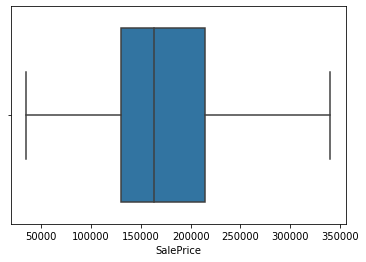

In [36]:
sns.boxplot(x=train_copy['SalePrice'])
print("No more outliers present beyond whiskers")

No more outliers present beyond whiskers


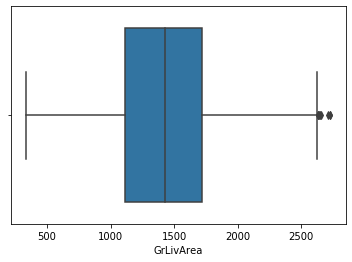

In [37]:
sns.boxplot(x=train_copy_2['GrLivArea'])
print("No more outliers present beyond whiskers")

No more outliers present beyond whiskers


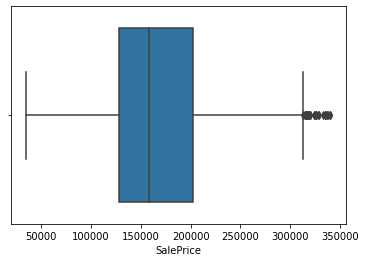

In [38]:
sns.boxplot(x=train_copy_2['SalePrice'])
print("No more outliers present beyond whiskers")

In [39]:
train['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [40]:
train_copy['GrLivArea'].describe()

count    1460.000000
mean     1503.735873
std       481.375641
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      2747.625000
Name: GrLivArea, dtype: float64

In [41]:
train_copy_2['GrLivArea'].describe()

count    1383.000000
mean     1453.518438
std       434.424442
min       334.000000
25%      1116.500000
50%      1431.000000
75%      1719.500000
max      2730.000000
Name: GrLivArea, dtype: float64

In [42]:
QQ1= train_copy_2['GrLivArea'].quantile(0.25)
QQ3= train_copy_2['GrLivArea'].quantile(0.75)
IQQR = QQ3-QQ1
print(IQQR)
QQ11= train_copy_2['SalePrice'].quantile(0.25)
QQ31= train_copy_2['SalePrice'].quantile(0.75)
IQQR1 = QQ31-QQ11
print(IQQR1)

603.0
73650.0


In [43]:
len(np.where((((train_copy_2['GrLivArea'] <(QQ1-1.5*IQQR)) | (train_copy_2['GrLivArea'] >(QQ3+1.5*IQQR)))))[0]) , len(np.where((((train_copy_2['SalePrice'] <(QQ11-1.5*IQQR1)) | (train_copy_2['SalePrice'] >(QQ31+1.5*IQQR1)))))[0])

(8, 37)

In [44]:
print("After we removed the outliers, we had new outliers; by removing them, we could focus more on the common pattern")

After we removed the outliers, we had new outliers; by removing them, we could focus more on the common pattern


In [45]:
QQ1= train_copy['GrLivArea'].quantile(0.25)
QQ3= train_copy['GrLivArea'].quantile(0.75)
IQQR = QQ3-QQ1
print(IQQR)
QQ11= train_copy['SalePrice'].quantile(0.25)
QQ31= train_copy['SalePrice'].quantile(0.75)
IQQR1 = QQ31-QQ11
print(IQQR1)

647.25
84025.0


In [46]:
len(np.where((((train_copy['GrLivArea'] <(QQ1-1.5*IQQR)) | (train_copy['GrLivArea'] >(QQ3+1.5*IQQR)))))[0]) , len(np.where((((train_copy['SalePrice'] <(QQ11-1.5*IQQR1)) | (train_copy['SalePrice'] >(QQ31+1.5*IQQR1)))))[0])

(0, 0)

In [47]:
print("But, when we replaced the outliers, there were no more outliers left")

But, when we replaced the outliers, there were no more outliers left
